In [ ]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 6.1 MB/s eta 0:00:00


In [ ]:
!pip install chonkie

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.0 MB/s eta 0:00:00


In [ ]:
pip install langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [ ]:
pip install langchain-huggingface

In [ ]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 36.5 MB/s eta 0:00:00


In [ ]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

import math
import json

from time import sleep

import docx
from docx import Document
from docx.text.paragraph import Paragraph

from tqdm import tqdm

random.seed(42)

# Задание 1

Спарсите любой сайт / телеграм канал / другой текстовый источник, на котором вы бы
хотели протестировать инструменты для чанкинга

In [ ]:
data = pd.DataFrame(columns=['Header','Text', 'CleanText'])
data

,Header,Text,CleanText


In [ ]:
def save_to_dataframe(file_path):
    global data

    doc = Document(file_path)
    tab_cnt = 0
    curr_par_len = 0
    chapters = []

    lvl = 0
    number_arr = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

    for el in doc.element.body:
        if el.tag.endswith('p'):

            paragraph = Paragraph(el, doc)
            style = paragraph.style.name

            if "Heading" in style:

                hd_parts = style.split()
                curr_lvl = int(hd_parts[-1]) - 1
                number_arr[curr_lvl] += 1

                # Проверим на заполнение номеров предыдущих уровней
                for level in range(curr_lvl):
                    if not number_arr[level]:
                        number_arr[level] = 1

                number = ""
                for i in range(curr_lvl+1):
                    if number:
                        number += "."
                    number += str(number_arr[i])

                while curr_lvl < lvl:
                    number_arr[lvl] = 0
                    lvl -= 1

                lvl = curr_lvl

                print(f"Добавлена глава: {number} {el.text.strip()}")
                # print("  "*curr_lvl + number + " " + el.text.strip())

                curr_par_len = 0

                header = el.text.strip()
                if type(header) == type(0.0):
                    header = ""
                chapters.append([number + " " + header, ""])

            elif paragraph.text:
                curr_par_len += len(paragraph.text)
                if len(chapters):
                    chapters[-1][-1] += paragraph.text
                else:
                    chapters.append([paragraph.text[:20], paragraph.text]) # текст до первого заголовка

        elif el.tag.endswith('tbl'):
            tab_cnt += 1

            table_data = []
            for row in doc.tables[tab_cnt-1].rows:
                row_data = [cell.text.strip() for cell in row.cells]
                table_data.append(row_data)

            if len(chapters):
                chapters[-1][-1] += str(table_data)
            else:
                chapters.append([str(table_data)[:20], str(table_data)])    # таблица до первого заголовка

    for chapter in chapters:
        new_row = {'Header': chapter[0], 'Text': chapter[1], 'CleanText': '', 'HTML': ''}
        data = pd.concat([data,
                          pd.DataFrame([new_row], columns=data.columns)],
                         ignore_index = True)
    return data

In [ ]:
data = save_to_dataframe("/content/merged_cr.docx")

Добавлена глава: 1 Назначение программного модуля CAD
Добавлена глава: 2 Условия выполнения программного модуля CAD
Добавлена глава: 3 Выполнение программного модуля CAD
Добавлена глава: 3.1 Запуск программного модуля CAD
Добавлена глава: 3.2 Управление приложениями
Добавлена глава: 3.3 Работа с документами
Добавлена глава: 3.3.1 Создание нового документа
Добавлена глава: 3.3.2 Открытие документов
Добавлена глава: 3.3.3 Сохранение документов
Добавлена глава: 3.3.4 Закрытие документа
Добавлена глава: 3.3.5 Настройка документов
Добавлена глава: 3.3.5.1 Свойства документа
Добавлена глава: 3.3.5.2 Атрибуты документа
Добавлена глава: 3.3.5.3 История документа
Добавлена глава: 3.3.5.4 Стили объектов
Добавлена глава: 3.4 Справочная система
Добавлена глава: 4 Интерфейс
Добавлена глава: 4.1 Окна программного модуля CAD
Добавлена глава: 4.1.1 Рабочие окна
Добавлена глава: 4.1.2 Вспомогательные окна
Добавлена глава: 4.2 Инструментальные панели
Добавлена глава: 4.2.1 Панель «Лента»
Добавлена глава

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Header     44 non-null     object
 1   Text       44 non-null     object
 2   CleanText  44 non-null     object
dtypes: object(3)
memory usage: 1.2+ KB


In [ ]:
data.head()

,Header,Text,CleanText
0,1 Назначение программного модуля CAD,Программный модуль CAD разработан на базе инте...,
1,2 Условия выполнения программного модуля CAD,Достаточными условиями выполнения программного...,
2,3 Выполнение программного модуля CAD,,
3,3.1 Запуск программного модуля CAD,Загрузка и запуск программного модуля CAD осущ...,
4,3.2 Управление приложениями,Данное окно предназначено для осуществления уп...,


# Задание 2

Проведите оценку полученных текстов — распределение длин текстов, ключевые слова, и
тд. Напишите выводы о полученном корпусе

In [ ]:
data['word_count'] = data['Text'].fillna('').str.split().str.len()

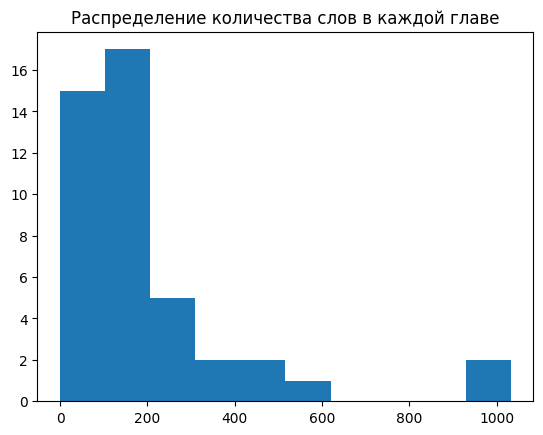

In [ ]:
plt.hist(data['word_count'].values)
plt.title("Распределение количества слов в каждой главе");

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem.snowball import SnowballStemmer

from wordcloud import WordCloud

In [ ]:
nltk.download('stopwords')
russian_stopwords = set(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = ' '.join([word for word in text.split() if word not in russian_stopwords])
    return text

In [ ]:
data['ProcessedText'] = data['Text'].apply(preprocess_text)
display(data.head())

,Header,Text,CleanText,word_count,ProcessedText
0,1 Назначение программного модуля CAD,Программный модуль CAD разработан на базе инте...,Программный модуль CAD разработан на базе инте...,55,программный модуль cad разработан базе интегри...
1,2 Условия выполнения программного модуля CAD,Достаточными условиями выполнения программного...,Достаточными условиями выполнения программного...,52,достаточными условиями выполнения программного...
2,3 Выполнение программного модуля CAD,,,0,
3,3.1 Запуск программного модуля CAD,Загрузка и запуск программного модуля CAD осущ...,,89,загрузка запуск программного модуля cad осущес...
4,3.2 Управление приложениями,Данное окно предназначено для осуществления уп...,,150,данное окно предназначено осуществления управл...


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
tfidf_matrix = tfidf_vectorizer.fit_transform(data['ProcessedText'].fillna(''))
feature_names = tfidf_vectorizer.get_feature_names_out()

print("Топ слов по TF-IDF в первом документе:")
feature_scores = zip(feature_names, tfidf_matrix[0].toarray()[0])
sorted_features = sorted(feature_scores, key=lambda x: x[1], reverse=True)
for feature, score in sorted_features[:10]:
    print(f"{feature}: {score:.4f}")

Топ слов по TF-IDF в первом документе:
объектов проектирования: 0.5575
проектирования: 0.5575
параметрами: 0.2585
объектов: 0.2099
параметрами объектов: 0.1675
различными: 0.1675
3d: 0.1545
соответствии: 0.1545
моделирования: 0.1444
информации: 0.1362


In [ ]:
count_vectorizer = CountVectorizer(max_features=1000, ngram_range=(1, 2))
count_matrix = count_vectorizer.fit_transform(data['ProcessedText'].fillna(''))
count_feature_names = count_vectorizer.get_feature_names_out()

print("\nТоп слов по CountVectorizer в первом документе:")
count_feature_scores = zip(count_feature_names, count_matrix[0].toarray()[0])
sorted_count_features = sorted(count_feature_scores, key=lambda x: x[1], reverse=True)
for feature, score in sorted_count_features[:10]:
    print(f"{feature}: {score}")


Топ слов по CountVectorizer в первом документе:
объектов: 3
объектов проектирования: 3
проектирования: 3
параметрами: 2
3d: 1
cad: 1
информации: 1
модели: 1
моделирования: 1
модуль: 1


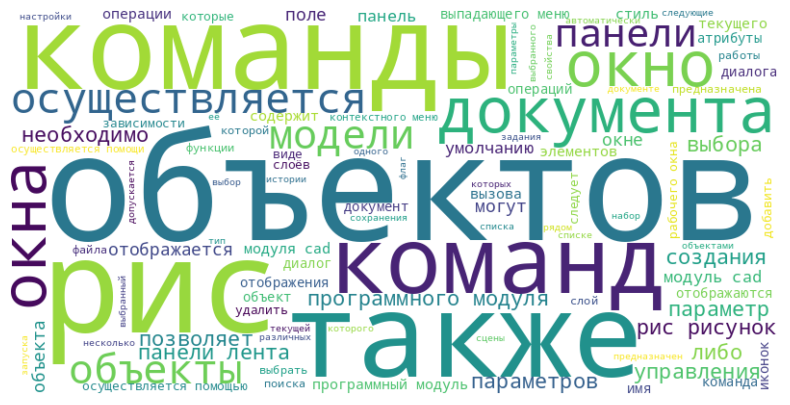

In [ ]:
all_text = ' '.join(data['ProcessedText'].fillna(''))

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='viridis').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Задание 3

Протестируйте чанкеры из chonkie, сделайте выводы о чанкерах, и какие из них оказались
наиболее полезными для конкретно ваших данных

In [ ]:
from chonkie import TokenChunker, SentenceChunker, RecursiveChunker, RecursiveRules, SemanticChunker

## TokenChunker

In [ ]:
token_chunker = TokenChunker(
    tokenizer="sergeyzh/rubert-mini-frida",
    chunk_size=256,
    chunk_overlap=64
)

tokenizer.json: 0.00B [00:00, ?B/s]

In [ ]:
data.ProcessedText[0]

'программный модуль cad разработан базе интегрированной инженерной программной платформы программноматематического ядра трехмерного моделирования rgkфункциональное назначение программного модуля cadсоздание редактирование геометрической модели объектов проектирования включая 3d 2dпредставлениязадание атрибутивной информации связанной точностными размерными технологическими параметрами объектов проектирования pmiоформление графической документации соответствии требованиями стандартов ескдвизуализация объектов проектирования различными параметрами отображения'

In [ ]:
chunked = token_chunker.chunk_batch(data.ProcessedText)

🦛 choooooooooooooooooooonk 100% • 44/44 batches chunked [00:00<00:00, 494.80batch/s] 🌱


In [ ]:
for i, text in enumerate(chunked[34:]):
    if data.iloc[i]["Text"]:
        print(f"Текст номер {i + 1}:")
        for chunk in text:
            print(f"Размер чанка: {chunk.token_count}")
            print(f"Текст чанка: {chunk.text}")
            print()
        print("="*20)

    # if i >= 10:
    #     break

Текст номер 1:
Размер чанка: 256
Текст чанка: ходе создания модели объектами могут возникать всевозможные связи которые будут иметь различный характер зависимости последовательности действий изменению состава параметров связей объектами формируется иерархическая структура зависимостей объектамиокно зависимости содержит информацию взаимосвязях выбранного объекта моделис родительскими объектами которых зависит выбранный объектс дочерними объектами которые зависят выбранного объектав очередь каждый родительский объект зависеть других объектов каждый дочерний иметь зависимые наличие зависимостей свидетельствует пиктограмма рядом объектом нажатии которой раскрывается цепочка зависимостей рис рисунок повторное нажатие пиктограммы сворачивает цепочку зависимостейдерево зависимостейрисунок управление родительскими дочерними объектами осуществляется помощью контекстного менювызов функции пересчёт осуществляется панели рабочего окна видпиктограмма вызова функции пересчёт имеет раскрывающийся спи

## SentenceChunker

In [ ]:
sentence_chunker = SentenceChunker(
    chunk_size=350,
    chunk_overlap=50
)

In [ ]:
chunked = sentence_chunker.chunk_batch(data.Text)

🦛 choooooooooooooooooooonk 100% • 44/44 docs chunked [00:00<00:00, 2325.06doc/s] 🌱


In [ ]:
for i, text in enumerate(chunked[34:]):
    if data.iloc[i]["Text"]:
        print(f"Текст номер {i + 1}:")
        for chunk in text:
            print(f"Размер чанка: {chunk.token_count}")
            print(f"Текст чанка: {chunk.text}")
            print()
        print("="*20)


Текст номер 1:
Размер чанка: 115
Текст чанка: В ходе создания модели между объектами могут возникать всевозможные связи, которые будут иметь различный характер. 

Размер чанка: 493
Текст чанка: В зависимости от последовательности действий по изменению состава, параметров и связей между объектами формируется иерархическая структура зависимостей между объектами.Окно «Зависимости» содержит информацию о взаимосвязях выбранного объекта модели:с родительскими объектами (от которых зависит выбранный объект);с дочерними объектами (которые зависят от выбранного объекта).В свою очередь, каждый родительский объект может зависеть от других объектов, а каждый дочерний может иметь зависимые. 

Размер чанка: 140
Текст чанка: О наличие зависимостей свидетельствует пиктограмма  рядом с объектом, при нажатии которой раскрывается цепочка зависимостей (рис. Рисунок). 

Размер чанка: 1317
Текст чанка: Повторное нажатие пиктограммы сворачивает цепочку зависимостей.Дерево зависимостейРисунок Управление родит

## RecursiveChunker

In [ ]:
recursive_chunker = RecursiveChunker(
    tokenizer_or_token_counter="sergeyzh/rubert-mini-frida",
    chunk_size=256,
    rules=RecursiveRules(),
    min_characters_per_chunk=24,
)

In [ ]:
chunked = recursive_chunker.chunk_batch(data.Text)

🦛 choooooooooooooooooooonk 100% • 44/44 docs chunked [00:05<00:00,  8.28doc/s] 🌱


In [ ]:
for i, text in enumerate(chunked[34:]):
    if data.iloc[i]["Text"]:
        print(f"Текст номер {i + 1}:")
        for chunk in text:
            print(f"Размер чанка: {chunk.token_count}")
            print(f"Текст чанка: {chunk.text}")
            print()
        print("="*20)

Текст номер 1:
Размер чанка: 130
Текст чанка: В ходе создания модели между объектами могут возникать всевозможные связи, которые будут иметь различный характер. В зависимости от последовательности действий по изменению состава, параметров и связей между объектами формируется иерархическая структура зависимостей между объектами.Окно «Зависимости» содержит информацию о взаимосвязях выбранного объекта модели:с родительскими объектами (от которых зависит выбранный объект);с дочерними объектами (которые зависят от выбранного объекта).В свою очередь, каждый родительский объект может зависеть от других объектов, а каждый дочерний может иметь зависимые. О наличие зависимостей свидетельствует пиктограмма  рядом с объектом, при нажатии которой раскрывается цепочка зависимостей (рис. Рисунок). 

Размер чанка: 255
Текст чанка: Повторное нажатие пиктограммы сворачивает цепочку зависимостей.Дерево зависимостейРисунок Управление родительскими и дочерними объектами осуществляется с помощью контекстног

## SemanticChunker

In [ ]:
semantic_chunker = SemanticChunker(
    embedding_model="minishlab/potion-base-32M",  # Default model
    threshold=0.8,                               # Similarity threshold (0-1)
    chunk_size=2048,                             # Maximum tokens per chunk
    similarity_window=3,                         # Window for similarity calculation
    skip_window=0                                # Skip-and-merge window (0=disabled)
)

/usr/local/lib/python3.12/dist-packages/chonkie/embeddings/auto.py:87: UserWarning: Failed to load minishlab/potion-base-32M with Model2VecEmbeddings: model2vec is not available. Please install it via `pip install chonkie[model2vec]`
Falling back to loading default provider model.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/chonkie/embeddings/auto.py:95: UserWarning: Failed to load the default model for Model2VecEmbeddings: model2vec is not available. Please install it via `pip install chonkie[model2vec]`
Falling back to SentenceTransformerEmbeddings.
  warnings.warn(


modules.json:   0%|          | 0.00/278 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

./model.safetensors:   0%|          | 0.00/129M [00:00<?, ?B/s]

In [ ]:
chunked = semantic_chunker.chunk_batch(data.Text)

🦛 choooooooooooooooooooonk 100% • 44/44 docs chunked [00:00<00:00, 68.09doc/s] 🌱


In [ ]:
for i, text in enumerate(chunked[34:]):
    if data.iloc[i]["Text"]:
        print(f"Текст номер {i + 1}:")
        for chunk in text:
            print(f"Размер чанка: {chunk.token_count}")
            print(f"Текст чанка: {chunk.text}")
            print()
        print("="*20)

Текст номер 1:
Размер чанка: 1729
Текст чанка: В ходе создания модели между объектами могут возникать всевозможные связи, которые будут иметь различный характер. В зависимости от последовательности действий по изменению состава, параметров и связей между объектами формируется иерархическая структура зависимостей между объектами.Окно «Зависимости» содержит информацию о взаимосвязях выбранного объекта модели:с родительскими объектами (от которых зависит выбранный объект);с дочерними объектами (которые зависят от выбранного объекта).В свою очередь, каждый родительский объект может зависеть от других объектов, а каждый дочерний может иметь зависимые. О наличие зависимостей свидетельствует пиктограмма  рядом с объектом, при нажатии которой раскрывается цепочка зависимостей (рис. Рисунок). Повторное нажатие пиктограммы сворачивает цепочку зависимостей.Дерево зависимостейРисунок Управление родительскими и дочерними объектами осуществляется с помощью контекстного меню.Вызов функции «Пересчёт» 

Использование методов

* TokenChunker - Очень полезен для управления размером окна контекста

* SentenceChunker - Аккуратное разбиение по предложениям (если они нормально оформлены)

* RecursiveChunker - Использую для разбиения глав на чанки. Реализует иерархию разбиений. сначала можно разделить по переносам, потом по знакам препинания

* SemanticChunker - Идея очень хорошая - разбить по смыслу, но очень сильно зависит от содержания текста и можно получить очень разные по размеру и содержанию фрагменты. На практике чаще приходится разбивать по границам разделов

# Задание 4

Поэкспериментируйте с ParentDocument Retriever, сделайте вывод о применимости и как
различные размеры чанков влияют на результат

In [75]:
from langchain.retrievers import ParentDocumentRetriever
from langchain.storage import InMemoryStore
from langchain_community.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.schema import Document as LangchainDocument
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [76]:
data = pd.read_csv("/content/parsed.csv")

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Header     44 non-null     object
 1   Text       40 non-null     object
 2   CleanText  21 non-null     object
dtypes: object(3)
memory usage: 1.2+ KB


In [78]:
data = data.fillna("")

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Header     44 non-null     object
 1   Text       44 non-null     object
 2   CleanText  44 non-null     object
dtypes: object(3)
memory usage: 1.2+ KB


In [81]:
embeddings = HuggingFaceEmbeddings(
    model_name="sergeyzh/rubert-mini-frida",
    model_kwargs={'device': 'cpu'},
    encode_kwargs={'normalize_embeddings': True}
)

In [98]:
parent_documents = []
child_documents = []

In [99]:
child_splitter = RecursiveCharacterTextSplitter(
    chunk_size=300,
    chunk_overlap=50,
    length_function=len,
    separators=["\n\n", "\n", ". ", "! ", "? ", " ", ""]
)

In [100]:
for idx, row in data.iterrows():
    if not row['Text'] or pd.isna(row['Text']) or len(row['Text']) == 0:
        continue

    parent_doc = LangchainDocument(
        page_content=row['Text'],
        metadata={
            'header': row['Header'],
            'source': 'document',
            'parent_id': f"parent_{idx}",
            'doc_id': f"parent_{idx}",
            'original_length': len(row['Text'])
        }
    )
    parent_documents.append(parent_doc)

    child_chunks = child_splitter.split_text(row['Text'])

    for chunk_idx, chunk_text in enumerate(child_chunks):
        child_doc = LangchainDocument(
            page_content=chunk_text,
            metadata={
                'header': row['Header'],
                'chunk_id': f"chunk_{idx}_{chunk_idx}",
                'parent_id': f"parent_{idx}",
                'chunk_index': chunk_idx,
                'total_chunks': len(child_chunks),
                'char_length': len(chunk_text)
            }
        )
        child_documents.append(child_doc)

In [101]:
len(parent_documents), len(child_documents)

(40, 340)

In [102]:
vectorstore = FAISS.from_documents(child_documents, embeddings)
docstore = InMemoryStore()

In [103]:
parent_id_to_doc = {}
for parent_doc in parent_documents:
    parent_id = parent_doc.metadata['parent_id']
    parent_id_to_doc[parent_id] = parent_doc

docstore.mset(list(parent_id_to_doc.items()))

print(f"Сохранено: {len(parent_id_to_doc)}")

Сохранено: 40


In [109]:
retriever = ParentDocumentRetriever(
    vectorstore=vectorstore,
    docstore=docstore,
    child_splitter=child_splitter,
    parent_splitter=None,
    search_kwargs={"k": 5}
)

In [110]:
query = "Какие есть окна?"

In [111]:
relevant_docs = vectorstore.similarity_search(query, k=3)

for i, doc in enumerate(relevant_docs):
    print(f"Результат {i+1}:")
    print(f"Заголовок: {doc.metadata.get('header', 'N/A')}")
    print(f"Текст: {doc.page_content[:150]}")
    print(f"Длина: {len(doc.page_content)}")
    print("="*20)

Результат 1:
Заголовок: 5.1.6 Свойства объектов
Текст: . Рисунок). Окно свойствРисунок В зависимости от типа выбранного объекта количество и наименование полей окна может быть разным
Длина: 127
Результат 2:
Заголовок: 4.1.1 Рабочие окна
Текст: . Основными типами рабочих окон являются:«3Dвид» – предназначен для отображения сцены с 3Dобъектами модели;«2Dвид» – предназначен для отображения 2Dоб
Длина: 298
Результат 3:
Заголовок: 4.1.1 Рабочие окна
Текст: рабочего окнаРисунок Каждое рабочее окно может содержать несколько видов с собственным типом и составом отображаемых объектов
Длина: 125


In [114]:
relevant_docs = retriever.invoke(query)

for i, doc in enumerate(relevant_docs):
    print(f"Результат {i+1}:")
    print(f"Заголовок: {doc.metadata.get('header', 'N/A')}")
    print(f"Текст: {doc.page_content[:150]}")
    print(f"Длина: {len(doc.page_content)}")
    print("="*20)

# Задание 5

Попробуйте провести дополнительную обработку чанков и/или текстов при помощи
LLM (суммаризация, генерация вопросов, и так далее), сделайте выводы

In [ ]:
from openai import OpenAI

from google.colab import userdata

MODEL_CONFIG = {
    "base_url": "https://api.vsegpt.ru/v1",
    "api_key": userdata.get('OPENAI_API_KEY'),
    "model_name": "openai/gpt-5-mini", # "openai/gpt-5-nano"
    "temperature": 0.1,
    "top_p": 0.9
}

In [ ]:
# llm = OpenAI(base_url=MODEL_CONFIG["base_url"], api_key=MODEL_CONFIG["api_key"])

In [ ]:
class LLM:
    def __init__(self):
        self.llm = OpenAI(base_url=MODEL_CONFIG["base_url"], api_key=MODEL_CONFIG["api_key"])
        self.system_prompt = "Ты выполняеешь задание пользователя. Не добавляй лишних слов, выводи только результат"

    def set_system_prompt(self, system_prompt: str):
        """Установка системного промпта"""
        self.system_prompt = system_prompt

    def generate_answer(self, question: str) -> str:
        """Генерация ответа модели"""

        # no_think = "/no_think\n"
        messages = []
        messages.append({"role": "system", "content": self.system_prompt})
        messages.append({"role": "user", "content": question}) # no_think +

        reply = self.llm.chat.completions.create(
            model=MODEL_CONFIG["model_name"],
            messages=messages,
            temperature=MODEL_CONFIG["temperature"],
            top_p=MODEL_CONFIG["top_p"],
            stream=False
        )

        return reply.choices[0].message.content #[19:]

In [ ]:
llm = LLM()

In [ ]:
llm.generate_answer("Напиши последовательно числа от 1 до 10")

'1 2 3 4 5 6 7 8 9 10'

In [ ]:
llm.generate_answer("Ответь на Главный вопрос Жизни, Вселенной и всего такого")

'42'

In [ ]:
llm.set_system_prompt(
            "Ты профессионально работаешь с текстом и выполняешь роль корректора. "
            "Исправляй опечатки, восстанавливай пропущенные пробелы и пунктуацию. "
            "Не добавляй лишних слов, выводи только результат"
        )

In [ ]:
BORDER = 2000

In [ ]:
for i in tqdm(range(data.shape[0])):
    if data.iloc[i]["Text"]:
        prompt = (
            f"Исправь опечатки в документе. Вставь пробелы где необходимо. "
            f"Удали служебные символы. Убери лишние переносы строк. "
            f"Выведи только исправленный текст документа. "
            f"Документ:\n\n{data.iloc[i]['Text'][:BORDER]}"
        )

        data.loc[i, 'CleanText'] = llm.generate_answer(prompt)

100%|██████████| 44/44 [29:24<00:00, 40.11s/it]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Header     44 non-null     object
 1   Text       44 non-null     object
 2   CleanText  44 non-null     object
dtypes: object(3)
memory usage: 1.2+ KB


In [ ]:
data.head()

,Header,Text,CleanText
0,1 Назначение программного модуля CAD,Программный модуль CAD разработан на базе инте...,Программный модуль CAD разработан на базе инте...
1,2 Условия выполнения программного модуля CAD,Достаточными условиями выполнения программного...,Достаточными условиями выполнения программного...
2,3 Выполнение программного модуля CAD,,
3,3.1 Запуск программного модуля CAD,Загрузка и запуск программного модуля CAD осущ...,
4,3.2 Управление приложениями,Данное окно предназначено для осуществления уп...,


In [ ]:
data.to_csv("parsed.csv", index=False)